In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

%matplotlib inline

plt.rcParams["figure.figsize"] = (14,9)


In [ ]:
breast_cancer_data = load_breast_cancer()

breast_cancer_df = pd.DataFrame(
    data=breast_cancer_data.data,
    columns=breast_cancer_data.feature_names
)

breast_cancer_df['target'] = breast_cancer_data.target

breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


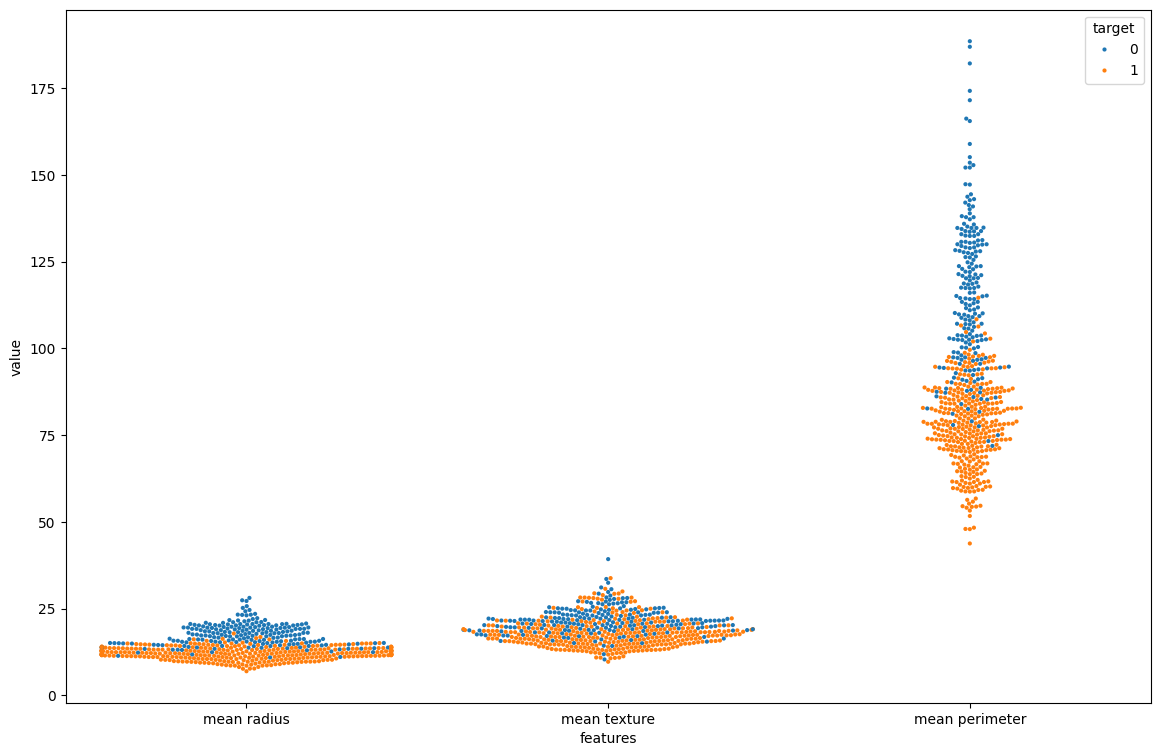

In [ ]:
from seaborn import swarmplot

data_to_plot = pd.melt(breast_cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'target']],
                       id_vars='target',
                       var_name='features',
                       value_name='value')

swarmplot(data=data_to_plot, x='features', y='value', hue='target', size=3);

In [ ]:
breast_cancer_df['target'].value_counts()


,count
target,
1,357
0,212


In [ ]:
from sklearn.model_selection import train_test_split

X = breast_cancer_df.drop(['target'], axis=1)
y = breast_cancer_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   stratify=y,
                                                   random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


Baseline model: Gradient Boosting Classifier with all features

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

# Train classifier using all features
gbc.fit(X_train, y_train)

# Make predictions
preds = gbc.predict(X_test)

# Evaluate the model using the F1-score
f1_score_all = round(f1_score(y_test, preds, average='weighted'), 3)

print(f1_score_all)

0.947


**Feature selection techniques**

Variance threshold

In [ ]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()


In [ ]:
# Calculate the variance of each feature
X_train_v1.var(axis=0)

,0
mean radius,12.177012
mean texture,20.254115
mean perimeter,579.070354
mean area,115800.811562
mean smoothness,0.000178
mean compactness,0.002848
mean concavity,0.006644
mean concave points,0.001497
mean symmetry,0.000787
mean fractal dimension,0.000053


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

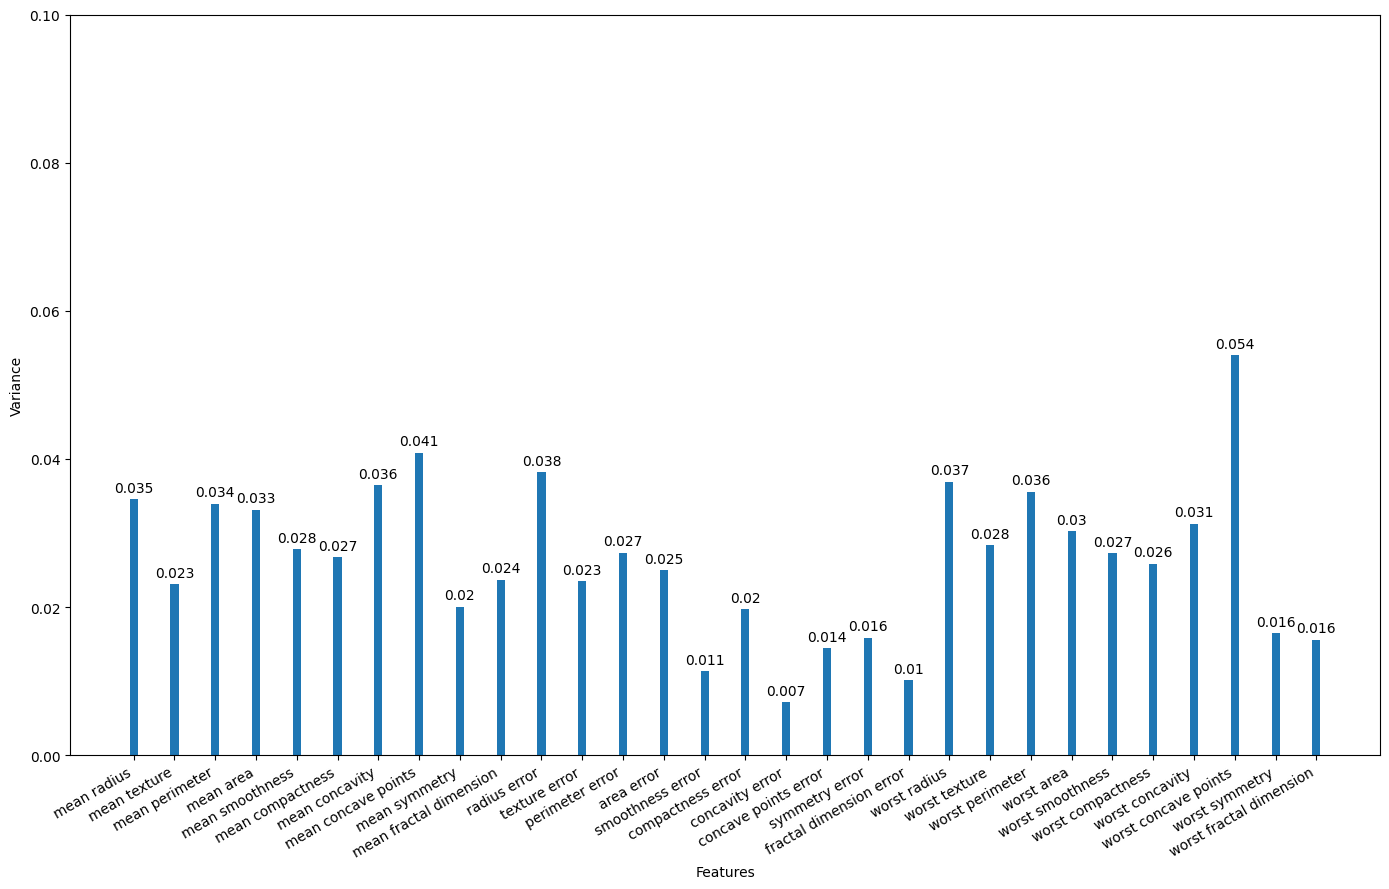

In [ ]:
fig, ax = plt.subplots()

x = X.columns
y = scaled_X_train_v1.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.1)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
sel_X_train_v1 = X_train_v1.drop(['smoothness error', 'concavity error', 'fractal dimension error', 'concave points error', 'symmetry error', 'worst symmetry', 'worst fractal dimension', 'mean symmetry', 'compactness error', 'mean texture', 'texture error'], axis=1)
sel_X_test_v1 = X_test_v1.drop(['smoothness error', 'concavity error', 'fractal dimension error', 'concave points error', 'symmetry error', 'worst symmetry', 'worst fractal dimension', 'mean symmetry', 'compactness error', 'mean texture', 'texture error'], axis=1)

gbc.fit(sel_X_train_v1, y_train)

var_preds = gbc.predict(sel_X_test_v1)

f1_score_var = round(f1_score(y_test_v1, var_preds, average='weighted'), 3)

print(f1_score_var)

0.953


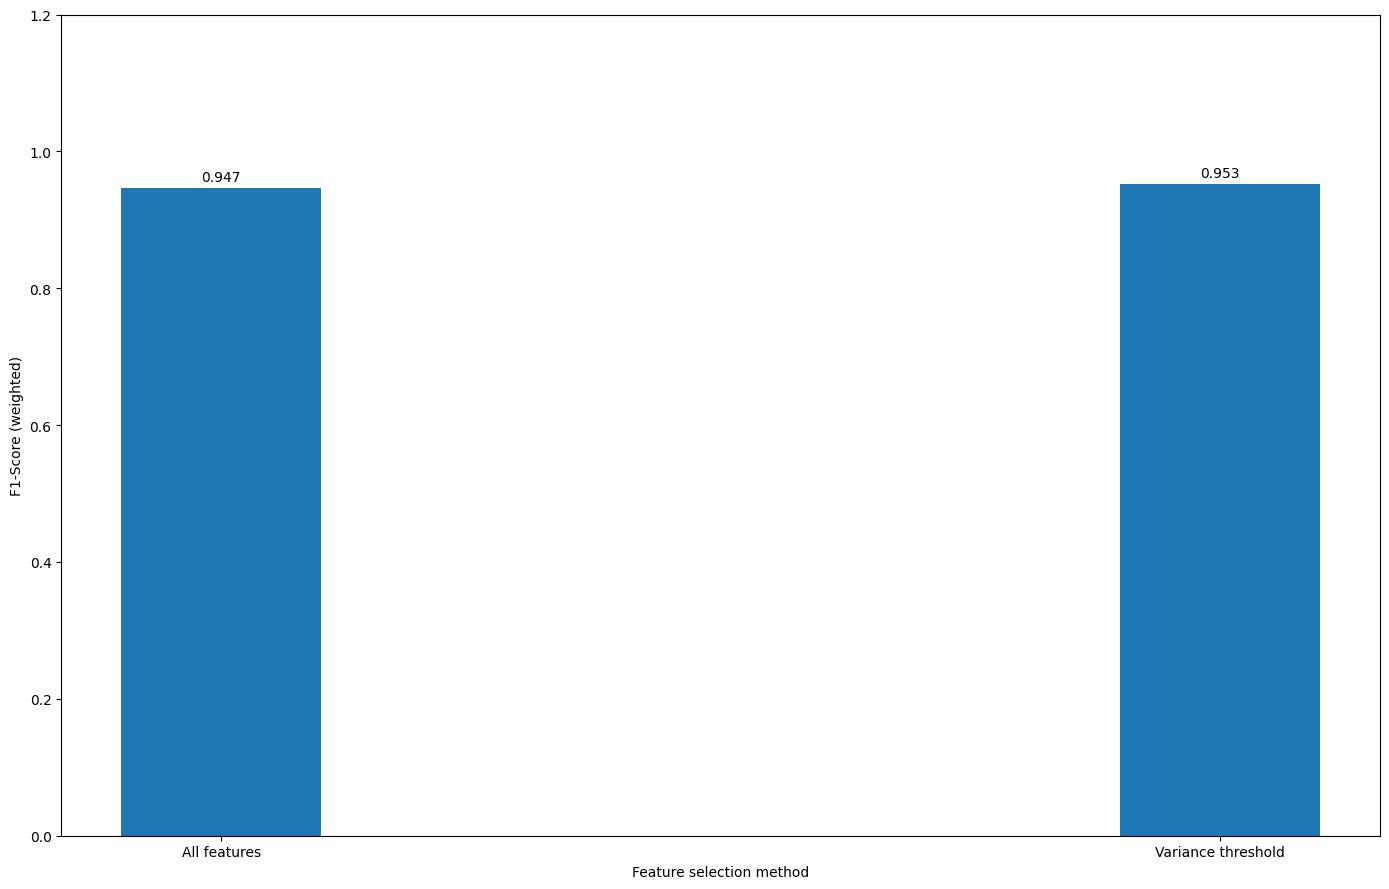

In [ ]:
fig, ax = plt.subplots()

x = ['All features', 'Variance threshold']
y = [f1_score_all, f1_score_var]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01, s=str(round(value,3)), ha='center')

plt.tight_layout()

K-best features


In [ ]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

f1_score_list = []

for k in range(1, 31):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)

    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)

    gbc.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = gbc.predict(sel_X_test_v2)

    f1_score_kbest = round(f1_score(y_test_v2, kbest_preds, average='weighted'), 3)

    f1_score_list.append(f1_score_kbest)

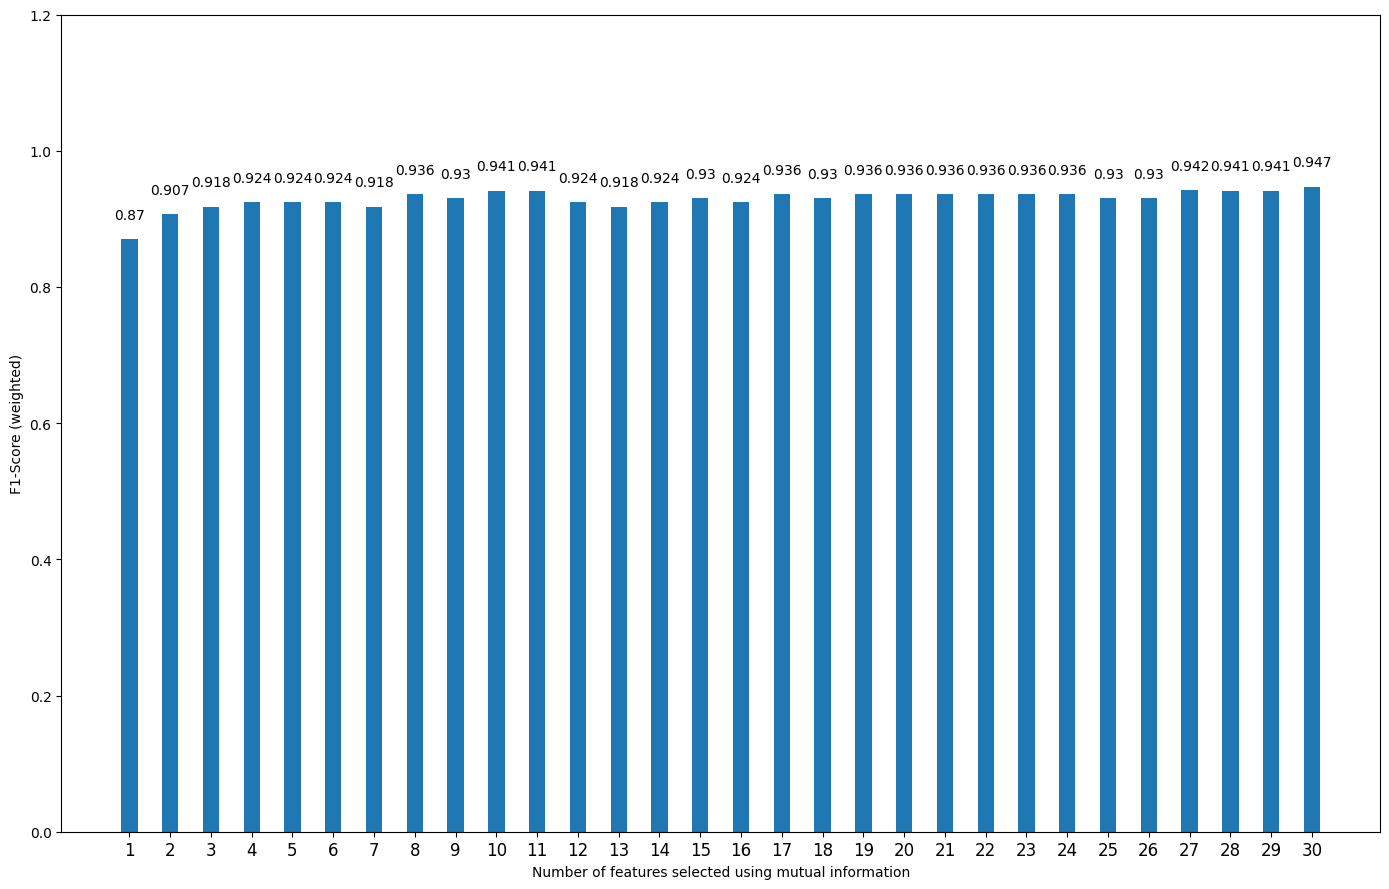

In [ ]:
fig, ax = plt.subplots()

x = np.arange(1, 31)
y = f1_score_list

ax.bar(x, y, width=0.4)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 31))
ax.set_xticklabels(np.arange(1, 31), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.03, s=str(v), ha='center', fontsize=10)

plt.tight_layout()

In [ ]:
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X_train_v2, y_train_v2)

selected_feature_mask = selector.get_support()

selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')

Recursive feature elimination (RFE)


In [ ]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()


In [ ]:
from sklearn.feature_selection import RFE

rfe_f1_score_list = []

for k in range(1, 31):
    RFE_selector = RFE(estimator=gbc, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v3, y_train_v3)

    sel_X_train_v3 = RFE_selector.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector.transform(X_test_v3)

    gbc.fit(sel_X_train_v3, y_train_v3)
    RFE_preds = gbc.predict(sel_X_test_v3)

    f1_score_rfe = round(f1_score(y_test_v3, RFE_preds, average='weighted'), 3)

    rfe_f1_score_list.append(f1_score_rfe)

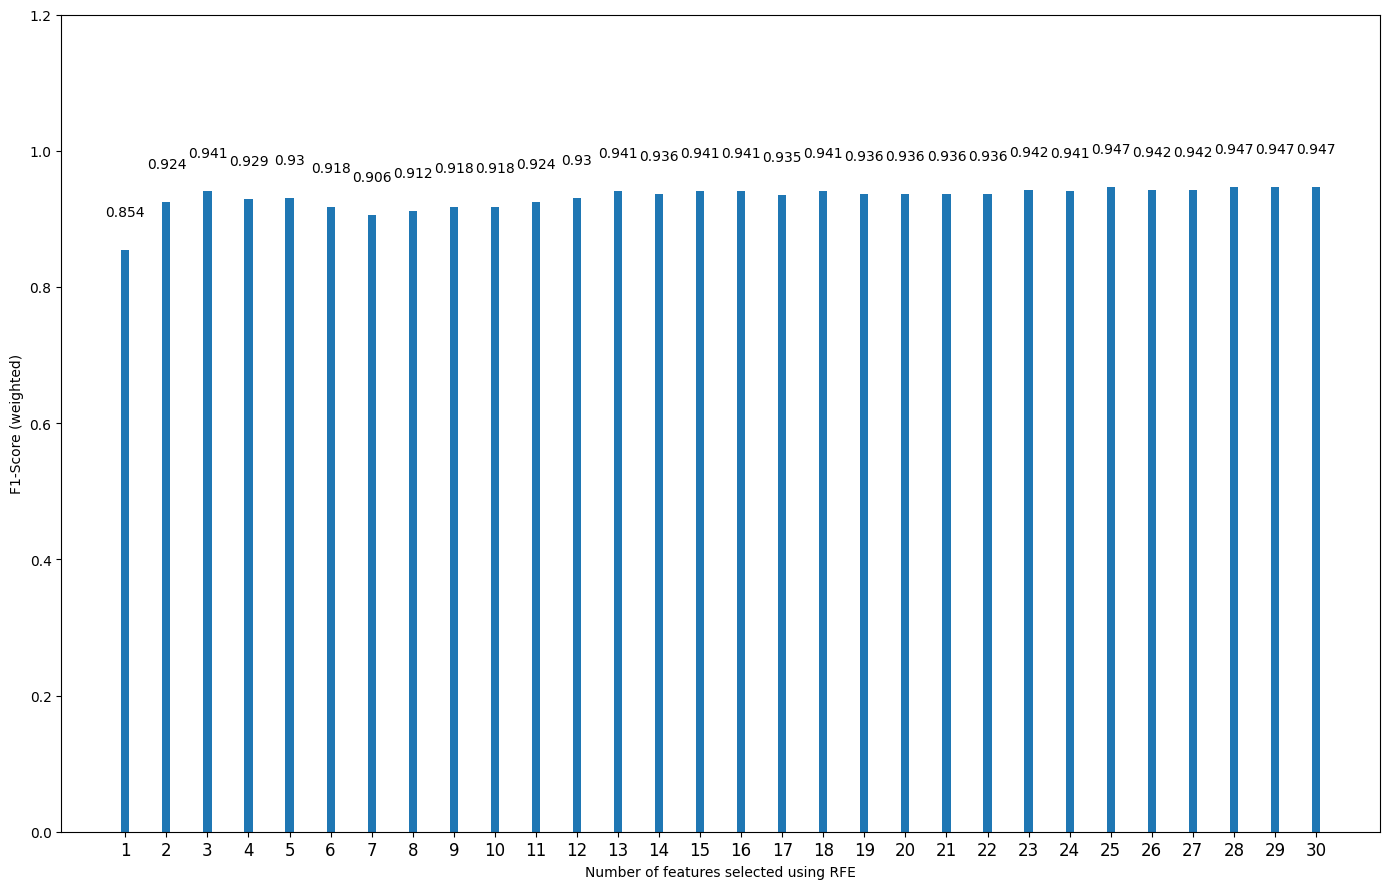

In [ ]:
fig, ax = plt.subplots()

x = np.arange(1, 31)
y = rfe_f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 31))
ax.set_xticklabels(np.arange(1, 31), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

plt.tight_layout()

In [ ]:
RFE_selector = RFE(estimator=gbc, n_features_to_select=5, step=10)
RFE_selector.fit(X_train_v3, y_train_v3)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['texture error', 'worst radius', 'worst texture', 'worst concavity',
       'worst concave points'],
      dtype='object')

Boruta


In [ ]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()


In [ ]:
!pip install boruta


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
from boruta import BorutaPy

boruta_selector = BorutaPy(gbc, random_state=42)

boruta_selector.fit(X_train_v4.values, y_train_v4.values.ravel())

sel_X_train_v4 = boruta_selector.transform(X_train_v4.values)
sel_X_test_v4 = boruta_selector.transform(X_test_v4.values)

gbc.fit(sel_X_train_v4, y_train_v4)

boruta_preds = gbc.predict(sel_X_test_v4)

boruta_f1_score = round(f1_score(y_test_v4, boruta_preds, average='weighted'), 3)

In [ ]:
selected_features_mask = boruta_selector.support_

selected_features = X_train_v4.columns[selected_features_mask]
selected_features

Index(['texture error', 'worst radius', 'worst texture', 'worst concavity',
       'worst concave points'],
      dtype='object')

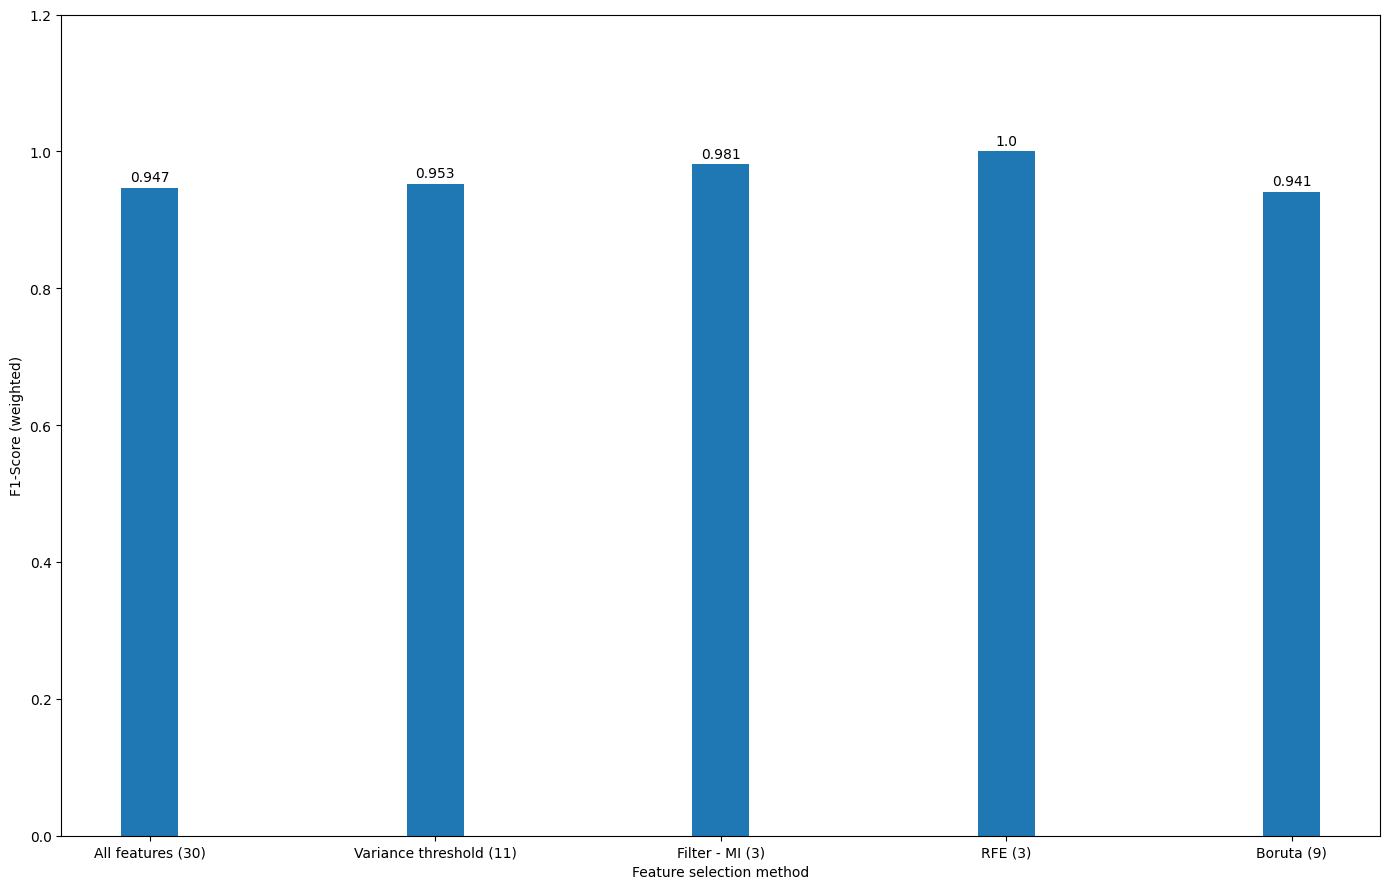

In [ ]:
fig, ax = plt.subplots()

x = ['All features (30)', 'Variance threshold (11)', 'Filter - MI (3)', 'RFE (3)', 'Boruta (9)']
y = [f1_score_all, f1_score_var, 0.981, 1.0, boruta_f1_score]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)

for i, v in enumerate(y):
    plt.text(x=i, y=v+0.01, s=str(v), ha='center')

plt.tight_layout()